# Import modules

In [1675]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV

# Load data

In [1676]:
df = pd.read_csv("dataset_mnist.csv")
display(df)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
34623,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
34624,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
34625,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [1677]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,...,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.000000,34627.00000
mean,12.096890,145.857077,148.903226,151.677824,153.984983,156.616600,158.904121,160.847171,162.610911,164.293384,...,140.574985,147.090479,152.791261,158.403211,161.332140,162.097063,161.923528,161.077136,160.211309,158.77919
std,7.333559,41.839313,40.355637,39.355866,38.762706,37.252215,36.130753,35.274594,34.137995,32.882325,...,63.914830,65.438124,64.713282,64.112086,64.055046,63.886450,64.166570,63.892399,64.395504,65.25230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,5.000000,122.000000,126.000000,130.000000,133.000000,137.000000,140.000000,143.000000,145.000000,146.000000,...,91.500000,96.000000,102.000000,110.000000,118.000000,122.000000,124.000000,124.000000,124.000000,121.00000
50%,12.000000,151.000000,154.000000,156.000000,158.000000,160.000000,163.000000,164.000000,166.000000,167.000000,...,142.000000,161.000000,172.000000,179.000000,183.000000,183.000000,183.000000,182.000000,182.000000,181.00000
75%,18.000000,175.000000,177.000000,179.000000,180.000000,181.000000,182.000000,184.000000,185.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,205.000000,204.00000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


In [1678]:
from sklearn.model_selection import train_test_split

X: pd.DataFrame = df.drop(["label"], axis = 1)
y: pd.DataFrame = df[["label"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
display(X_train)
display(y_train)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6053,223,224,226,226,227,226,224,225,225,223,...,126,72,48,209,190,117,128,141,76,63
28495,60,61,62,65,69,72,77,86,94,99,...,122,99,89,72,134,171,165,166,168,169
14282,178,178,178,178,178,177,177,178,178,178,...,173,157,181,194,160,132,144,164,181,181
21121,178,181,182,184,185,185,186,186,187,187,...,239,237,234,233,230,227,225,223,220,218
19288,86,89,92,95,107,122,134,140,145,155,...,208,180,141,127,111,73,45,69,64,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,185,187,189,190,191,193,194,194,195,194,...,232,231,231,231,231,231,231,230,229,229
32511,182,184,186,187,187,187,187,186,186,186,...,205,205,204,203,203,202,200,197,197,196
5192,171,172,173,175,177,177,178,178,178,178,...,109,132,181,201,199,186,165,156,127,109
12172,170,172,174,176,177,177,176,177,178,178,...,204,205,204,203,204,202,201,200,198,197


,label
6053,7
28495,10
14282,8
21121,11
19288,22
...,...
7813,23
32511,2
5192,0
12172,19


In [1679]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


# Visualize data / perform EDA

## Data Visualisasi 1
Untuk visualisasi 1 kami melakukan visualisasi terhadap distribusi dari data per label

<Axes: xlabel='label', ylabel='count'>

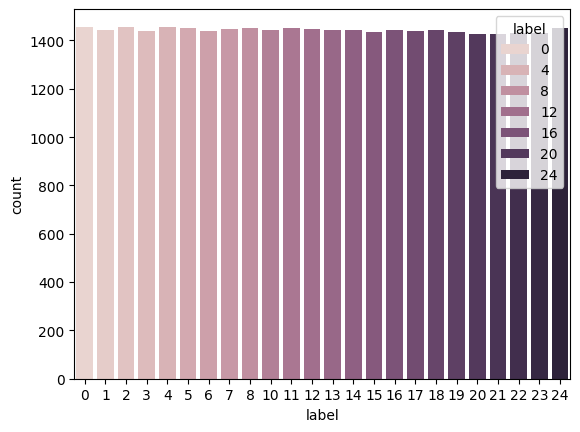

In [1680]:
df['label'].value_counts() 
sns.countplot(data=df, x='label', hue="label")

### Kesimpulan
1. Distribusi dari data sudah merata sehingga model akan memiliki potensi bias yang rendah saat memprediksi data.
2. Sampel dari data sudah cukup banyak untuk digunakan dalam membuat model, ditambah distribusi yang rata maka hal ini dapat mengurangi resiko dari overfitting. Model akan mempelajari semua pola secara umum karena semua instancenya merata dan cukup banyak untuk membuat suatu generalisasi.

## Data Visualization 2
Pada bagian ini, kami melakukan visualisasi terhadap intensitas dari grayscale yang dimiliki setiap label

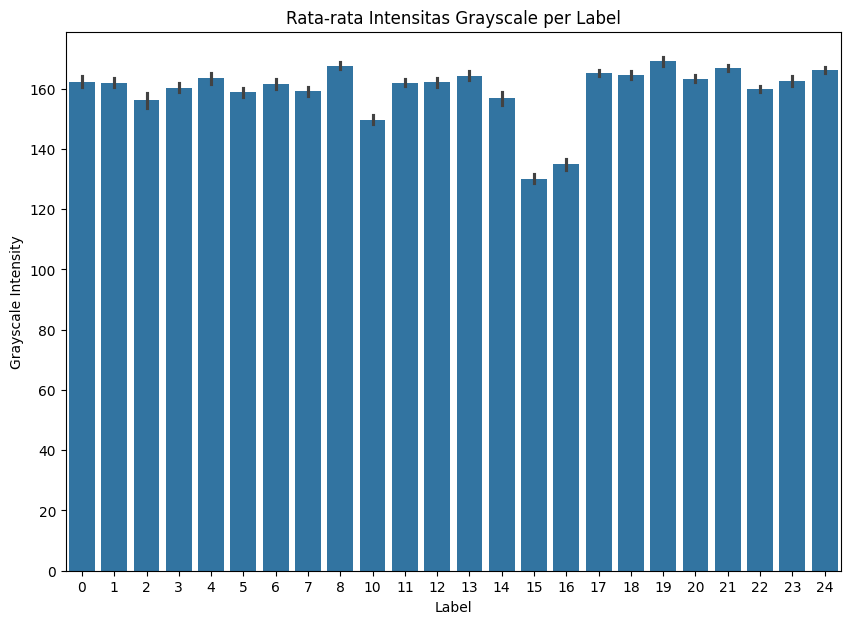

In [1681]:
#Grayscale intensity per label
avg_intensity= df.groupby('label').mean()
avg_intensity = avg_intensity.reset_index()
avg_intensity_melt = avg_intensity.melt(id_vars='label', var_name='pixel', value_name='grayscale intensity')
plt.figure(figsize=(10, 7))
sns.barplot(data=avg_intensity_melt, x='label', y='grayscale intensity')

#Label
plt.xlabel('Label')
plt.ylabel("Grayscale Intensity")
plt.title('Rata-rata Intensitas Grayscale per Label')
plt.show()

### Kesimpulan
1. Hampir semua sign language memiliki intensitas yang mirip, hal ini bisa menjadi tanda awal bahwa model yang kami buat harus memiliki kinerja yang baik karena rawan terjadi salah prediksi. Namun perlu di-ingat bahwa kami akan melatih model menggunakan data per pixel bukan rata-rata, visualisasi ini hanya sebagai peringatan awal saja.
2. Label 15 dan 16 ("P" dan "Q") memiliki intensitas grayscale yang rendah dibandingkan huruf lainnya.

## Data Visualization 3

Di sini, kami mengambil 24 baris data yang merepresentasikan sebuah huruf spesifik, lalu menyuguhkan representasi visualnya.

In [1682]:
df_24_only = df.iloc[:0].copy()
set_24 = set()

count = 0
for index, row in df.iterrows():
    label_value: int = row["label"]
    pixel_values: list[int] = row[1:].tolist()
    index_of_letter: int = index
    if label_value not in set_24:
        set_24.add(label_value)
        df_24_only.loc[count] = [label_value] + pixel_values
        count += 1
    if len(set_24) == 24:
        break

df_24_only = df_24_only.sort_values(by=['label'], ascending=True)  # sort labels alphabetically
df_24_only.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20,0,197,195,196,195,197,196,195,196,196,...,84,65,182,213,211,212,212,213,213,213
15,1,146,149,150,150,151,152,152,153,153,...,196,197,197,196,196,195,194,194,190,187
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
19,4,221,221,222,222,222,224,223,220,220,...,6,8,0,193,249,234,236,233,233,232


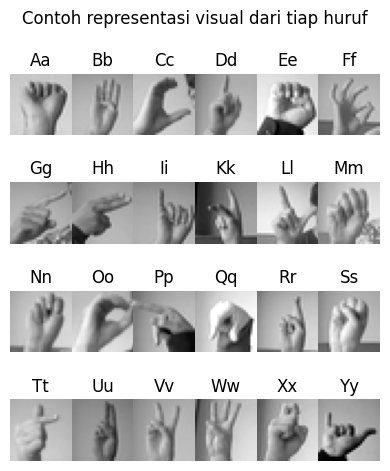

In [1683]:
def visualize_each_letter(bitsperpixel):

    # Create a figure and a grid of 24 subplots, each representing a single letter
    fig, axs = plt.subplots(4, 6, figsize=(4, 5))
    fig.suptitle("Contoh representasi visual dari tiap huruf")

    for index, ax in enumerate(axs.flat):
        if index < 24:  # only use the first 24 subplots
            image_array = df_24_only.iloc[index, 1:].values.reshape(28, 28)
            ax.imshow(image_array, cmap='gray', vmin=0, vmax=bitsperpixel - 1)
            ax.set_axis_off()  # turn off axis labels
            alphabet_index = df_24_only.iloc[index, 0]
            ax.set_title(f"{chr(65 + alphabet_index)}{chr(97 + alphabet_index)}")
        # else:  # any remaining subplot shall stay hidden
        #     ax.set_visible(False)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()  # show all the subplots

visualize_each_letter(bitsperpixel=256)

# Begin preprocessing

## Preprocessing 1 - Thresholding

Thresholding adalah salah satu metode image segmentation yang paling sederhana. Gambar grayscale 8-bit (dengan nilai pixel 0-255) diubah menjadi biner (dengan nilai pixel 0-1), sesuai dengan nilai threshold. Pixel yang lebih gelap dari nilai threshold dibuat bernilai 0, sedangkan sisanya 1. Teknik ini dianggap cukup efektif untuk data gambar dengan kontras yang tinggi dan pencahayaan seragam.

Di sini, kami memakai rata-rata warna pixel dari setiap baris data sebagai threshold bagi baris tersebut.

https://en.wikipedia.org/wiki/Thresholding_(image_processing)

https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c

In [1684]:
X_train = np.array(X_train.values)  # pandas df -> np array
row_means = np.mean(X_train, axis=1, keepdims=True)  # calculate mean for each array row
X_train = np.where(X_train < row_means, 0, 1)

X_test = np.array(X_test.values)
row_means = np.mean(X_test, axis=1, keepdims=True)
X_test = np.where(X_test < row_means, 0, 1)

In [1685]:
arr_24_only = np.array(df_24_only.values)
row_means = np.mean(arr_24_only, axis=1, keepdims=True)
arr_24_only = np.where(arr_24_only < row_means, 0, 1)
df_24_only.iloc[:, 1:] = arr_24_only[:, 1:]

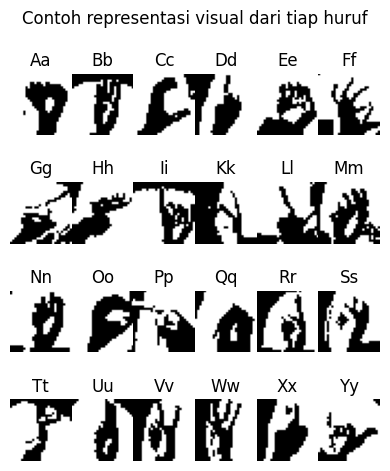

In [1686]:
visualize_each_letter(bitsperpixel=2)

In [1687]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", C=10)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1688]:
all_labels = df["label"].unique()
all_labels = np.sort(all_labels)

Text(0.5, 427.9555555555555, 'Predicted label')

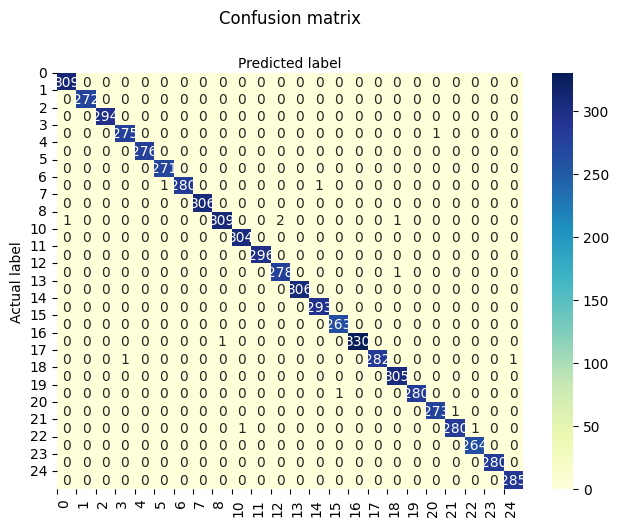

In [1689]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=all_labels)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(all_labels))
plt.xticks(tick_marks, all_labels, ha="left")
plt.yticks(tick_marks, all_labels, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1690]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00       272
           2       1.00      1.00      1.00       294
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00       276
           5       1.00      1.00      1.00       271
           6       1.00      0.99      1.00       282
           7       1.00      1.00      1.00       306
           8       1.00      0.99      0.99       313
          10       1.00      1.00      1.00       304
          11       1.00      1.00      1.00       296
          12       0.99      1.00      0.99       279
          13       1.00      1.00      1.00       306
          14       1.00      1.00      1.00       293
          15       1.00      1.00      1.00       263
          16       1.00      1.00      1.00       331
          17       1.00      0.99      1.00       284
          18       0.99    

# Random Forest (Training and Test)

In [1691]:
from sklearn.ensemble import RandomForestClassifier

In [1692]:
# Number of trees in random forest
n_estimators = [200, 500]

# Number of features to consider at every split
max_features =  ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(4, 8, 5)]

# measure the quality of a split
criterion = ['gini', 'entropy']

c:\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[12 18 15 ...  6  0  4]


In [ ]:
# Create the param grid

param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
}

In [ ]:
rf_Grid = GridSearchCV(
    estimator = RandomForestClassifier(), 
    param_grid = param_grid,
    cv = 2, 
    verbose = 3,
    n_jobs = -1
)

rf_Grid.fit(X_train, y_train)
rf_Grid.best_params_

In [ ]:
model_randomForest = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 'sqrt', n_estimators= 500)
model_randomForest.fit(X_train, y_train)

y_pred_randomForest = model_randomForest.predict(X_test)

print(y_pred_randomForest)

In [1693]:
trainRfScore = model_randomForest.score(X_train, y_train)
testRfScore = model_randomForest.score(X_test, y_test)

print(f"Score for training: {trainRfScore}")
print(f"Score for test: {testRfScore}")

Score for training: 1.0
Score for test: 1.0
